# pons_py Tutorial

This is a tutorial on the main functions of the pons_py library. If you still have questions or issues after having a look at this and the documentation of each function, feel free to raise an issue on the Github repository.

The library is divided into 3 classes:
- Processing: For the creation of Speaker Landscapes and Social Networks.
- Calculation: For the calculation of polarisation measures and term correlations
- Visualisation: For the visualisation of single layers, multilayers, and polarisation measures.

## Installation and Import

In [1]:
# Paste this into your terminal to install pons_py: pip install git+https://github.com/andres-martinez-torres/pons_py.git
# or run this on a Jupyter notebook: !pip install git+https://github.com/andres-martinez-torres/pons_py.git 

In [2]:
import pons_py

Running in Jupyter Notebook. Setting backend to 'widget'.
Matplotlib Backend: widget


In [3]:
# A few other imports we will use for this tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Processing


Let's begin by creating a Speaker landscape from a DataFrame. The data used for this example is from the CongressTweets data available here: LINK

Note: The integration here of Speaker Landscapes is merely an adaptation of the work by Schuld et al,... available here. For further explanation of the method as well as the original code (which might help you better understand the process) is available here: LINK

In [4]:
text_data = pd.read_json('2023_no_rt.jl', lines=True)
text_data = text_data.drop_duplicates(subset=['author_username', 'tweet'])

In [5]:
text_data

,id,user_id,name,party,author_username,tweet,created_at
0,1632610659262234624,975200486,Thomas Massie,R,RepThomasMassie,"I’ve been in it for 12+ years, so please belie...",2023-03-06 05:14:48
1,1632609752965431296,975200486,Thomas Massie,R,RepThomasMassie,"I’ve been in it for 12+ years, so please belie...",2023-03-06 05:11:12
2,1632902269346643968,975200486,Thomas Massie,R,RepThomasMassie,I’ll be @TuckerCarlson’s guest on “Tucker Carl...,2023-03-07 00:33:33
3,1632953020051865600,975200486,Thomas Massie,R,RepThomasMassie,There are so many lies about COVID that I almo...,2023-03-07 03:55:13
4,1646793190639382528,975200486,Thomas Massie,R,RepThomasMassie,"@JohnSchneeman Ethically, shouldn’t doctors di...",2023-04-14 08:31:07
...,...,...,...,...,...,...,...
214107,1610039294889959424,221162525,Pat Toomey,R,SenToomey,"Despite our challenges, I’m extremely bullish ...",2023-01-02 22:24:15
214108,1610037635791130624,221162525,Pat Toomey,R,SenToomey,Representing Pennsylvania in the United States...,2023-01-02 22:17:40
214109,1610055814525423616,219429281,Adam Kinzinger,R,RepKinzinger,"Thank you, IL-16. Good luck, Kevin. Kinzinger ...",2023-01-02 23:29:54
214110,1610054858018627584,811986281177772032,Trey Hollingsworth,R,RepTrey,"I’ve fought to promote our values, address our...",2023-01-02 23:26:06


In [6]:
# Let's grab the our columns of interest, mainly the username, the text of the tweets, and the party of the author

text_data = text_data[['author_username', 'name', 'tweet', 'party']]

In [7]:
# Initialise the processing object
processor = pons_py.Processing(text_data)

And let's create our Speaker Landscape. The function returns the Word2Vec model and a dataframe of the speakers and their 2d and 1d coordinates. We will preprocess the text (although you can do that on your own before passing the text data), indicate the speaker and speech columns, and leave the rest of arguments as default.

The function also accepts Word2Vec and UMAP arguments as dictionary in case you want to change the defaults. If you want a lot of fine control over every step of the process, do instead use the original code by Schuld et al... HERE. This is merely an adaptation of their code, so all merit goes to them.

Aside from the function outputting the W2V model and the coordinates dataframe, the preprocessed text and the W2V is also saved to file, so you can see the result of the preprocessing and how the text is yielded to the W2V function. The model is also saved to file so you can use it outside of the library and for reproducibility.

Note: there have been complaints about the loss logging of the Word2Vec algorithm. We have included it in the output of the function for informative purposes, but do take it with a grain of salt.

In [8]:
model, sl = processor.speaker_landscape(speaker_col='author_username', speech_col='tweet', preprocess=True)

Preprocessing data...


2024-08-14 12:35:04,509 : INFO : collecting all words and their counts
2024-08-14 12:35:04,510 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-08-14 12:35:04,651 : INFO : PROGRESS: at sentence #10000, processed 285312 words and 177482 word types


Making bigrams...


2024-08-14 12:35:04,817 : INFO : PROGRESS: at sentence #20000, processed 590548 words and 320015 word types
2024-08-14 12:35:04,997 : INFO : PROGRESS: at sentence #30000, processed 894029 words and 448746 word types
2024-08-14 12:35:05,169 : INFO : PROGRESS: at sentence #40000, processed 1187395 words and 567084 word types
2024-08-14 12:35:05,349 : INFO : PROGRESS: at sentence #50000, processed 1492841 words and 669219 word types
2024-08-14 12:35:05,561 : INFO : PROGRESS: at sentence #60000, processed 1830707 words and 789014 word types
2024-08-14 12:35:05,756 : INFO : PROGRESS: at sentence #70000, processed 2149851 words and 896540 word types
2024-08-14 12:35:05,958 : INFO : PROGRESS: at sentence #80000, processed 2479046 words and 1000103 word types
2024-08-14 12:35:06,157 : INFO : PROGRESS: at sentence #90000, processed 2798319 words and 1106549 word types
2024-08-14 12:35:06,364 : INFO : PROGRESS: at sentence #100000, processed 3127347 words and 1206165 word types
2024-08-14 12:35:

Making ngrams...


2024-08-14 12:35:15,339 : INFO : PROGRESS: at sentence #20000, processed 552703 words and 330548 word types
2024-08-14 12:35:15,503 : INFO : PROGRESS: at sentence #30000, processed 834612 words and 466045 word types
2024-08-14 12:35:15,663 : INFO : PROGRESS: at sentence #40000, processed 1105327 words and 590859 word types
2024-08-14 12:35:15,839 : INFO : PROGRESS: at sentence #50000, processed 1384848 words and 699899 word types
2024-08-14 12:35:16,030 : INFO : PROGRESS: at sentence #60000, processed 1697403 words and 827007 word types
2024-08-14 12:35:16,215 : INFO : PROGRESS: at sentence #70000, processed 1991877 words and 941241 word types
2024-08-14 12:35:16,406 : INFO : PROGRESS: at sentence #80000, processed 2294633 words and 1051898 word types
2024-08-14 12:35:16,595 : INFO : PROGRESS: at sentence #90000, processed 2589819 words and 1164681 word types
2024-08-14 12:35:16,790 : INFO : PROGRESS: at sentence #100000, processed 2893289 words and 1270882 word types
2024-08-14 12:35:

Training word2vec model...


2024-08-14 12:35:28,724 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-08-14 12:35:28,972 : INFO : PROGRESS: at sentence #10000, processed 294156 words, keeping 34505 word types
2024-08-14 12:35:29,217 : INFO : PROGRESS: at sentence #20000, processed 593597 words, keeping 54302 word types
2024-08-14 12:35:29,466 : INFO : PROGRESS: at sentence #30000, processed 889344 words, keeping 71913 word types
2024-08-14 12:35:29,717 : INFO : PROGRESS: at sentence #40000, processed 1188866 words, keeping 88142 word types
2024-08-14 12:35:29,974 : INFO : PROGRESS: at sentence #50000, processed 1489824 words, keeping 103616 word types
2024-08-14 12:35:30,226 : INFO : PROGRESS: at sentence #60000, processed 1791314 words, keeping 118489 word types
2024-08-14 12:35:30,479 : INFO : PROGRESS: at sentence #70000, processed 2091529 words, keeping 133257 word types
2024-08-14 12:35:30,729 : INFO : PROGRESS: at sentence #80000, processed 2395881 words, keeping 147610 word ty

Loss after epoch 1: 11293423.0


2024-08-14 12:35:49,899 : INFO : EPOCH 1 - PROGRESS: at 2.86% examples, 135622 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:35:50,903 : INFO : EPOCH 1 - PROGRESS: at 9.50% examples, 226602 words/s, in_qsize 14, out_qsize 0
2024-08-14 12:35:51,933 : INFO : EPOCH 1 - PROGRESS: at 15.95% examples, 252256 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:35:52,952 : INFO : EPOCH 1 - PROGRESS: at 22.19% examples, 263748 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:35:53,972 : INFO : EPOCH 1 - PROGRESS: at 28.11% examples, 267476 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:35:54,978 : INFO : EPOCH 1 - PROGRESS: at 34.46% examples, 274345 words/s, in_qsize 12, out_qsize 0
2024-08-14 12:35:55,985 : INFO : EPOCH 1 - PROGRESS: at 40.67% examples, 278113 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:35:56,995 : INFO : EPOCH 1 - PROGRESS: at 46.15% examples, 276124 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:35:58,175 : INFO : EPOCH 1 - PROGRESS: at 52.71% examples, 275216 words/s, i

Loss after epoch 2: 8744515.0


2024-08-14 12:36:06,014 : INFO : EPOCH 2 - PROGRESS: at 2.40% examples, 113470 words/s, in_qsize 11, out_qsize 5
2024-08-14 12:36:07,025 : INFO : EPOCH 2 - PROGRESS: at 8.53% examples, 203474 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:36:08,053 : INFO : EPOCH 2 - PROGRESS: at 14.83% examples, 234539 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:09,136 : INFO : EPOCH 2 - PROGRESS: at 21.24% examples, 248552 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:10,222 : INFO : EPOCH 2 - PROGRESS: at 27.61% examples, 256304 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:36:11,224 : INFO : EPOCH 2 - PROGRESS: at 34.13% examples, 266211 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:12,244 : INFO : EPOCH 2 - PROGRESS: at 39.99% examples, 268497 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:13,267 : INFO : EPOCH 2 - PROGRESS: at 45.77% examples, 269151 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:36:14,313 : INFO : EPOCH 2 - PROGRESS: at 52.34% examples, 273026 words/s, i

Loss after epoch 3: 7903440.0


2024-08-14 12:36:22,265 : INFO : EPOCH 3 - PROGRESS: at 3.18% examples, 150600 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:23,280 : INFO : EPOCH 3 - PROGRESS: at 7.92% examples, 187689 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:24,286 : INFO : EPOCH 3 - PROGRESS: at 14.10% examples, 223206 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:36:25,330 : INFO : EPOCH 3 - PROGRESS: at 20.03% examples, 236786 words/s, in_qsize 13, out_qsize 1
2024-08-14 12:36:26,350 : INFO : EPOCH 3 - PROGRESS: at 26.10% examples, 247512 words/s, in_qsize 16, out_qsize 1
2024-08-14 12:36:27,391 : INFO : EPOCH 3 - PROGRESS: at 31.86% examples, 251179 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:28,402 : INFO : EPOCH 3 - PROGRESS: at 38.20% examples, 259084 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:36:29,474 : INFO : EPOCH 3 - PROGRESS: at 44.12% examples, 260308 words/s, in_qsize 9, out_qsize 1
2024-08-14 12:36:30,495 : INFO : EPOCH 3 - PROGRESS: at 50.49% examples, 265126 words/s, in

Loss after epoch 4: 7087042.0


2024-08-14 12:36:39,213 : INFO : EPOCH 4 - PROGRESS: at 2.21% examples, 104081 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:40,256 : INFO : EPOCH 4 - PROGRESS: at 8.70% examples, 202569 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:41,259 : INFO : EPOCH 4 - PROGRESS: at 14.72% examples, 230367 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:36:42,283 : INFO : EPOCH 4 - PROGRESS: at 20.35% examples, 239542 words/s, in_qsize 11, out_qsize 1
2024-08-14 12:36:43,313 : INFO : EPOCH 4 - PROGRESS: at 26.11% examples, 246114 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:44,323 : INFO : EPOCH 4 - PROGRESS: at 31.84% examples, 251246 words/s, in_qsize 15, out_qsize 1
2024-08-14 12:36:45,333 : INFO : EPOCH 4 - PROGRESS: at 37.86% examples, 257081 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:46,371 : INFO : EPOCH 4 - PROGRESS: at 43.78% examples, 259646 words/s, in_qsize 10, out_qsize 2
2024-08-14 12:36:47,377 : INFO : EPOCH 4 - PROGRESS: at 49.58% examples, 261648 words/s, i

Loss after epoch 5: 4568004.0


2024-08-14 12:36:56,064 : INFO : EPOCH 5 - PROGRESS: at 2.04% examples, 95936 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:57,080 : INFO : EPOCH 5 - PROGRESS: at 8.01% examples, 189733 words/s, in_qsize 15, out_qsize 1
2024-08-14 12:36:58,089 : INFO : EPOCH 5 - PROGRESS: at 13.70% examples, 216723 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:36:59,106 : INFO : EPOCH 5 - PROGRESS: at 19.48% examples, 231526 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:00,106 : INFO : EPOCH 5 - PROGRESS: at 25.41% examples, 242715 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:01,107 : INFO : EPOCH 5 - PROGRESS: at 31.12% examples, 248852 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:02,130 : INFO : EPOCH 5 - PROGRESS: at 36.87% examples, 252449 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:03,133 : INFO : EPOCH 5 - PROGRESS: at 42.77% examples, 256708 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:04,147 : INFO : EPOCH 5 - PROGRESS: at 48.26% examples, 257158 words/s, in

Loss after epoch 6: 4597196.0


2024-08-14 12:37:13,391 : INFO : EPOCH 6 - PROGRESS: at 3.64% examples, 168209 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:14,422 : INFO : EPOCH 6 - PROGRESS: at 8.66% examples, 202146 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:15,448 : INFO : EPOCH 6 - PROGRESS: at 14.63% examples, 228495 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:16,448 : INFO : EPOCH 6 - PROGRESS: at 20.44% examples, 241188 words/s, in_qsize 11, out_qsize 0
2024-08-14 12:37:17,453 : INFO : EPOCH 6 - PROGRESS: at 26.53% examples, 251700 words/s, in_qsize 11, out_qsize 0
2024-08-14 12:37:18,457 : INFO : EPOCH 6 - PROGRESS: at 31.82% examples, 252517 words/s, in_qsize 14, out_qsize 2
2024-08-14 12:37:19,486 : INFO : EPOCH 6 - PROGRESS: at 37.59% examples, 255382 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:20,515 : INFO : EPOCH 6 - PROGRESS: at 43.49% examples, 258412 words/s, in_qsize 15, out_qsize 1
2024-08-14 12:37:21,640 : INFO : EPOCH 6 - PROGRESS: at 48.98% examples, 255612 words/s, i

Loss after epoch 7: 4528928.0


2024-08-14 12:37:30,622 : INFO : EPOCH 7 - PROGRESS: at 3.01% examples, 140655 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:31,624 : INFO : EPOCH 7 - PROGRESS: at 8.25% examples, 194983 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:32,631 : INFO : EPOCH 7 - PROGRESS: at 13.94% examples, 220440 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:33,644 : INFO : EPOCH 7 - PROGRESS: at 19.45% examples, 231069 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:34,685 : INFO : EPOCH 7 - PROGRESS: at 25.05% examples, 237440 words/s, in_qsize 11, out_qsize 1
2024-08-14 12:37:35,703 : INFO : EPOCH 7 - PROGRESS: at 30.46% examples, 241306 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:36,729 : INFO : EPOCH 7 - PROGRESS: at 36.54% examples, 248052 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:37:37,743 : INFO : EPOCH 7 - PROGRESS: at 42.28% examples, 251527 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:38,766 : INFO : EPOCH 7 - PROGRESS: at 48.19% examples, 254825 words/s, i

Loss after epoch 8: 4501040.0


2024-08-14 12:37:47,902 : INFO : EPOCH 8 - PROGRESS: at 3.01% examples, 143694 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:37:48,933 : INFO : EPOCH 8 - PROGRESS: at 8.05% examples, 190443 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:49,990 : INFO : EPOCH 8 - PROGRESS: at 13.54% examples, 211344 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:37:51,020 : INFO : EPOCH 8 - PROGRESS: at 19.51% examples, 228513 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:37:52,060 : INFO : EPOCH 8 - PROGRESS: at 25.44% examples, 238403 words/s, in_qsize 12, out_qsize 1
2024-08-14 12:37:53,081 : INFO : EPOCH 8 - PROGRESS: at 31.37% examples, 245580 words/s, in_qsize 14, out_qsize 0
2024-08-14 12:37:54,089 : INFO : EPOCH 8 - PROGRESS: at 36.46% examples, 245914 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:37:55,096 : INFO : EPOCH 8 - PROGRESS: at 41.72% examples, 247104 words/s, in_qsize 13, out_qsize 3
2024-08-14 12:37:56,127 : INFO : EPOCH 8 - PROGRESS: at 47.35% examples, 249004 words/s, i

Loss after epoch 9: 4293664.0


2024-08-14 12:38:05,419 : INFO : EPOCH 9 - PROGRESS: at 2.88% examples, 137001 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:06,424 : INFO : EPOCH 9 - PROGRESS: at 8.07% examples, 193549 words/s, in_qsize 13, out_qsize 1
2024-08-14 12:38:07,463 : INFO : EPOCH 9 - PROGRESS: at 13.57% examples, 214920 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:08,476 : INFO : EPOCH 9 - PROGRESS: at 19.20% examples, 228625 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:09,479 : INFO : EPOCH 9 - PROGRESS: at 24.96% examples, 238831 words/s, in_qsize 12, out_qsize 0
2024-08-14 12:38:10,484 : INFO : EPOCH 9 - PROGRESS: at 30.55% examples, 244276 words/s, in_qsize 13, out_qsize 0
2024-08-14 12:38:11,486 : INFO : EPOCH 9 - PROGRESS: at 36.43% examples, 250327 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:12,507 : INFO : EPOCH 9 - PROGRESS: at 42.33% examples, 254323 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:13,528 : INFO : EPOCH 9 - PROGRESS: at 47.82% examples, 254919 words/s, i

Loss after epoch 10: 4259112.0


2024-08-14 12:38:22,877 : INFO : EPOCH 10 - PROGRESS: at 2.99% examples, 132154 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:23,962 : INFO : EPOCH 10 - PROGRESS: at 8.51% examples, 188529 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:24,981 : INFO : EPOCH 10 - PROGRESS: at 14.20% examples, 214054 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:25,992 : INFO : EPOCH 10 - PROGRESS: at 19.65% examples, 225783 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:27,002 : INFO : EPOCH 10 - PROGRESS: at 25.22% examples, 234507 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:28,117 : INFO : EPOCH 10 - PROGRESS: at 31.17% examples, 238719 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:29,142 : INFO : EPOCH 10 - PROGRESS: at 36.91% examples, 243498 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:30,157 : INFO : EPOCH 10 - PROGRESS: at 42.51% examples, 246517 words/s, in_qsize 15, out_qsize 1
2024-08-14 12:38:31,200 : INFO : EPOCH 10 - PROGRESS: at 48.48% examples, 249735 w

Loss after epoch 11: 4232960.0


2024-08-14 12:38:40,450 : INFO : EPOCH 11 - PROGRESS: at 3.01% examples, 142943 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:41,628 : INFO : EPOCH 11 - PROGRESS: at 8.22% examples, 180698 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:42,642 : INFO : EPOCH 11 - PROGRESS: at 13.89% examples, 208968 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:43,683 : INFO : EPOCH 11 - PROGRESS: at 19.56% examples, 222083 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:44,728 : INFO : EPOCH 11 - PROGRESS: at 25.66% examples, 234112 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:45,737 : INFO : EPOCH 11 - PROGRESS: at 30.76% examples, 236332 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:46,739 : INFO : EPOCH 11 - PROGRESS: at 35.85% examples, 238107 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:38:47,751 : INFO : EPOCH 11 - PROGRESS: at 41.47% examples, 241894 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:38:48,756 : INFO : EPOCH 11 - PROGRESS: at 47.42% examples, 246705 w

Loss after epoch 12: 1230932.0


2024-08-14 12:38:58,227 : INFO : EPOCH 12 - PROGRESS: at 3.03% examples, 142753 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:38:59,331 : INFO : EPOCH 12 - PROGRESS: at 8.07% examples, 183170 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:00,344 : INFO : EPOCH 12 - PROGRESS: at 14.04% examples, 216330 words/s, in_qsize 14, out_qsize 0
2024-08-14 12:39:01,359 : INFO : EPOCH 12 - PROGRESS: at 19.36% examples, 225642 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:02,368 : INFO : EPOCH 12 - PROGRESS: at 24.80% examples, 233035 words/s, in_qsize 13, out_qsize 0
2024-08-14 12:39:03,370 : INFO : EPOCH 12 - PROGRESS: at 30.57% examples, 240670 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:39:04,377 : INFO : EPOCH 12 - PROGRESS: at 36.14% examples, 244897 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:05,387 : INFO : EPOCH 12 - PROGRESS: at 41.25% examples, 245187 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:39:06,393 : INFO : EPOCH 12 - PROGRESS: at 47.01% examples, 248870 w

Loss after epoch 13: 182912.0


2024-08-14 12:39:15,849 : INFO : EPOCH 13 - PROGRESS: at 2.71% examples, 129110 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:39:16,926 : INFO : EPOCH 13 - PROGRESS: at 7.76% examples, 179348 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:17,942 : INFO : EPOCH 13 - PROGRESS: at 13.59% examples, 211363 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:18,948 : INFO : EPOCH 13 - PROGRESS: at 19.53% examples, 229817 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:19,954 : INFO : EPOCH 13 - PROGRESS: at 24.97% examples, 236507 words/s, in_qsize 13, out_qsize 0
2024-08-14 12:39:21,007 : INFO : EPOCH 13 - PROGRESS: at 30.88% examples, 242818 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:22,015 : INFO : EPOCH 13 - PROGRESS: at 36.29% examples, 245605 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:23,023 : INFO : EPOCH 13 - PROGRESS: at 41.44% examples, 245916 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:24,065 : INFO : EPOCH 13 - PROGRESS: at 47.21% examples, 248526 w

Loss after epoch 14: 178816.0


2024-08-14 12:39:33,598 : INFO : EPOCH 14 - PROGRESS: at 2.85% examples, 135989 words/s, in_qsize 15, out_qsize 1
2024-08-14 12:39:34,648 : INFO : EPOCH 14 - PROGRESS: at 8.49% examples, 199795 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:39:35,673 : INFO : EPOCH 14 - PROGRESS: at 13.36% examples, 209941 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:36,701 : INFO : EPOCH 14 - PROGRESS: at 19.00% examples, 223876 words/s, in_qsize 14, out_qsize 1
2024-08-14 12:39:37,740 : INFO : EPOCH 14 - PROGRESS: at 24.47% examples, 230300 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:38,752 : INFO : EPOCH 14 - PROGRESS: at 30.41% examples, 239276 words/s, in_qsize 10, out_qsize 0
2024-08-14 12:39:39,792 : INFO : EPOCH 14 - PROGRESS: at 35.84% examples, 241550 words/s, in_qsize 15, out_qsize 0
2024-08-14 12:39:40,805 : INFO : EPOCH 14 - PROGRESS: at 41.27% examples, 243951 words/s, in_qsize 16, out_qsize 0
2024-08-14 12:39:41,824 : INFO : EPOCH 14 - PROGRESS: at 46.91% examples, 246619 w

Loss after epoch 15: 170560.0
Training done!
Number of agents in training set:  926
Number of agents with more than 5 tweets:  808
Reducing to 2d
Reducing to 1d


In [9]:
sl

,author_username,text,count,2d_vec_x,2d_vec_y,1d_vec
0,AOC,if scotus was serious_about their ludicrous co...,91,6.704457,5.460813,6.106984
1,AdamKinzinger,watching the january_6th documentary right_now...,29,6.897204,5.480605,5.743248
2,AdamSchiff,this year i requested 3_million to restore gow...,229,5.201012,6.889565,7.686483
3,AlexPadilla4CA,releasing sensitive material related to the 16...,510,4.835780,7.388630,8.250977
6,AndyKimNJ,but now we have one less tool to break down ba...,116,6.398176,5.655276,6.219301
...,...,...,...,...,...,...
920,vgescobar,grateful to see another year to be surrounded ...,21,6.708106,6.543935,5.022716
921,virginiafoxx,happy_independence_day 🇺🇸🇺🇸🇺🇸 httppbstwimgcomm...,38,9.692699,6.540047,0.178791
922,votetimscott,rise and shine jax friends today is the first ...,607,9.126459,6.530179,1.356715
923,westerncaucus,last_week our members were in fort worth for a...,260,8.158468,8.548788,2.368835


Let's add back in the party identifier. Easily done with a simple merge.

In [10]:
t = text_data[['author_username', 'party']].drop_duplicates()

sl = pd.merge(sl, t, how='left')

In [11]:
sl

,author_username,text,count,2d_vec_x,2d_vec_y,1d_vec,party
0,AOC,if scotus was serious_about their ludicrous co...,91,6.704457,5.460813,6.106984,D
1,AdamKinzinger,watching the january_6th documentary right_now...,29,6.897204,5.480605,5.743248,R
2,AdamSchiff,this year i requested 3_million to restore gow...,229,5.201012,6.889565,7.686483,D
3,AlexPadilla4CA,releasing sensitive material related to the 16...,510,4.835780,7.388630,8.250977,D
4,AndyKimNJ,but now we have one less tool to break down ba...,116,6.398176,5.655276,6.219301,D
...,...,...,...,...,...,...,...
803,vgescobar,grateful to see another year to be surrounded ...,21,6.708106,6.543935,5.022716,D
804,virginiafoxx,happy_independence_day 🇺🇸🇺🇸🇺🇸 httppbstwimgcomm...,38,9.692699,6.540047,0.178791,R
805,votetimscott,rise and shine jax friends today is the first ...,607,9.126459,6.530179,1.356715,R
806,westerncaucus,last_week our members were in fort worth for a...,260,8.158468,8.548788,2.368835,R


Let's also create a social network from an edgelist drawn from the RTs of congress members. We don't need to reinitialise the class with the new data (although that is possible if you want) and we can input the edgelist or an already created NetworkX graph object directly into the function.

For the moment, the implementation of the ForceAtlas2 algorithm for the network layout does not support multithreading. For small networks it is rather fast (under a minute for this example). However, if your network is large, I recommend you instead use Gephi, run the layout there and export the node table with the coordinates. You can then import those here and merge them with your SL to create your pons object.

In [12]:
edgelist = pd.read_csv('2023_sn_only-congress.csv')

In [13]:
graph, sn = processor.social_network(edge_list=edgelist, directed=True)

100%|██████████| 20000/20000 [00:53<00:00, 375.43it/s]

BarnesHut Approximation  took  10.30  seconds
Repulsion forces  took  38.50  seconds
Gravitational forces  took  0.36  seconds
Attraction forces  took  0.82  seconds
AdjustSpeedAndApplyForces step  took  1.93  seconds


In [14]:
sn

,x,y,speaker
Thomas Massie,39.436053,-277.538759,Thomas Massie
House Committee on the Judiciary,356.847617,-600.168282,House Committee on the Judiciary
House Committee on Rules,280.803253,-388.706534,House Committee on Rules
Dan Bishop,-131.538131,-298.530779,Dan Bishop
Mary Miller,-76.274804,-339.389823,Mary Miller
...,...,...,...
House Select Subcommittee on the Coronavirus Crisis,581.183821,-457.001263,House Select Subcommittee on the Coronavirus C...
Mo Brooks,-31850.021258,18424.248672,Mo Brooks
David Cawthorn,-266.686745,-319.272327,David Cawthorn
Marie Newman,5026.757611,36581.664262,Marie Newman


We can also add the parties to the social network for visualisation

In [15]:
sn= pd.merge(sn, text_data[['name', 'author_username', 'party']].drop_duplicates(), left_on='speaker', right_on='name', how='left')

In [16]:
sn

,x,y,speaker,name,author_username,party
0,39.436053,-277.538759,Thomas Massie,Thomas Massie,RepThomasMassie,R
1,39.436053,-277.538759,Thomas Massie,Thomas Massie,MassieforKY,R
2,356.847617,-600.168282,House Committee on the Judiciary,House Committee on the Judiciary,JudiciaryGOP,None
3,356.847617,-600.168282,House Committee on the Judiciary,House Committee on the Judiciary,HouseJudiciary,None
4,280.803253,-388.706534,House Committee on Rules,House Committee on Rules,RulesReps,None
...,...,...,...,...,...,...
926,-31850.021258,18424.248672,Mo Brooks,Mo Brooks,RepMoBrooks,R
927,-266.686745,-319.272327,David Cawthorn,David Cawthorn,CawthornforNC,R
928,5026.757611,36581.664262,Marie Newman,Marie Newman,newmarienewman,D
929,5026.757611,36581.664262,Marie Newman,Marie Newman,RepMarieNewman,D


## Visualisation

Now that we have our coordinates for our SL and SN, we can visualise them. We can initialise a Visualisation for each, but for simplicity, we recommend merging the two dataframes and that way you only need to initialise the class once and visualise the layers as you want.

In our case, we are only considering the variable 'party', but now would be the time to add other ones you might be interested in visualising or studying.

Let's bring the layers together and visualise them.

In [17]:
pons = pd.merge(sl, sn, how='left', left_on='author_username', right_on='author_username') 

# We merge left to keep all the speakers in the speaker landscape, even if they are not in the social network. But this is up to you.

In [18]:
pons = pons.drop(columns=['party_y'])
# We drop the columns that are repeated

In [19]:
pons

,author_username,text,count,2d_vec_x,2d_vec_y,1d_vec,party_x,x,y,speaker,name
0,AOC,if scotus was serious_about their ludicrous co...,91,6.704457,5.460813,6.106984,D,351.579440,5.730892,Alexandria Ocasio-Cortez,Alexandria Ocasio-Cortez
1,AdamKinzinger,watching the january_6th documentary right_now...,29,6.897204,5.480605,5.743248,R,240.890826,-174.818762,Adam Kinzinger,Adam Kinzinger
2,AdamSchiff,this year i requested 3_million to restore gow...,229,5.201012,6.889565,7.686483,D,356.441344,-74.153392,Adam Schiff,Adam Schiff
3,AlexPadilla4CA,releasing sensitive material related to the 16...,510,4.835780,7.388630,8.250977,D,356.251145,216.895245,Alex Padilla,Alex Padilla
4,AndyKimNJ,but now we have one less tool to break down ba...,116,6.398176,5.655276,6.219301,D,519.544292,-188.874241,Andy Kim,Andy Kim
...,...,...,...,...,...,...,...,...,...,...,...
803,vgescobar,grateful to see another year to be surrounded ...,21,6.708106,6.543935,5.022716,D,495.546553,-227.365033,Veronica Escobar,Veronica Escobar
804,virginiafoxx,happy_independence_day 🇺🇸🇺🇸🇺🇸 httppbstwimgcomm...,38,9.692699,6.540047,0.178791,R,206.640077,-520.332257,Virginia Foxx,Virginia Foxx
805,votetimscott,rise and shine jax friends today is the first ...,607,9.126459,6.530179,1.356715,R,-40.715897,-146.195200,Tim Scott,Tim Scott
806,westerncaucus,last_week our members were in fort worth for a...,260,8.158468,8.548788,2.368835,R,54.813498,-574.367761,Congressional Western Caucus,Congressional Western Caucus


In [20]:
viz = pons_py.Visualisation(pons)

Visualisation object created with 808 rows of data and columms: author_username, text, count, 2d_vec_x, 2d_vec_y, 1d_vec, party_x, x, y, speaker, name.


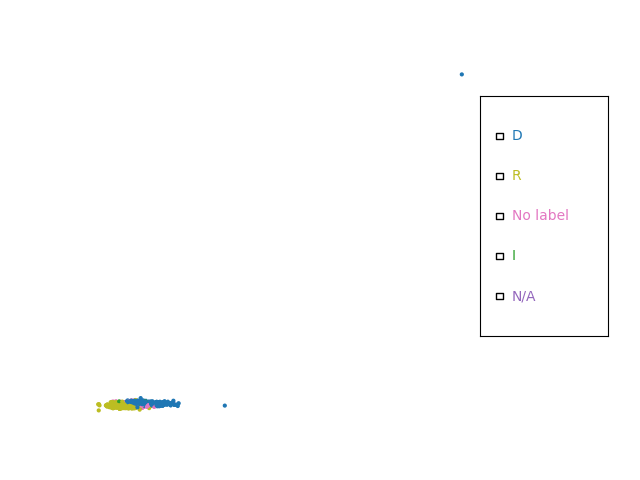

In [21]:
viz.single_layer(x='x', y='y', cvar='party_x', cvar_type='categorical', interactive=True)

As you can see above, at times if a user only has very few edges it will be placed far away from everyone else, shaping the visualisation to the point (possibly) of making it useless. This can be resolved in various ways, a common one being droping users with less than a certain number of edges. You can do that by creating the network object before creating the layout in Processing().social_network()

The Visualisation class allows you to not visualise outliers with a Z-score (number of standard deviations from the mean) > 3. This does not delete them from the data that you inputted during class initialisation. To do this, set drop_outliers=True, which works for single layer and multilayer visualisations.

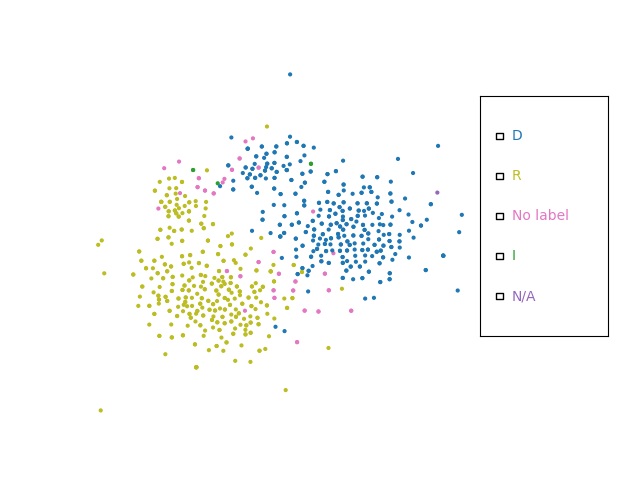

In [40]:
viz.single_layer(x='x', y='y', cvar='party_x', cvar_type='categorical', interactive=True, drop_outliers=True)

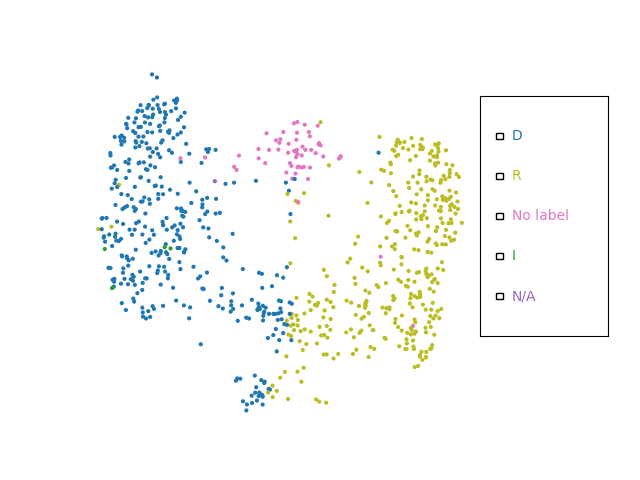

In [39]:
viz.single_layer(x='2d_vec_x', y='2d_vec_y', cvar='party_x', cvar_type='categorical', interactive=True)

Common: 804


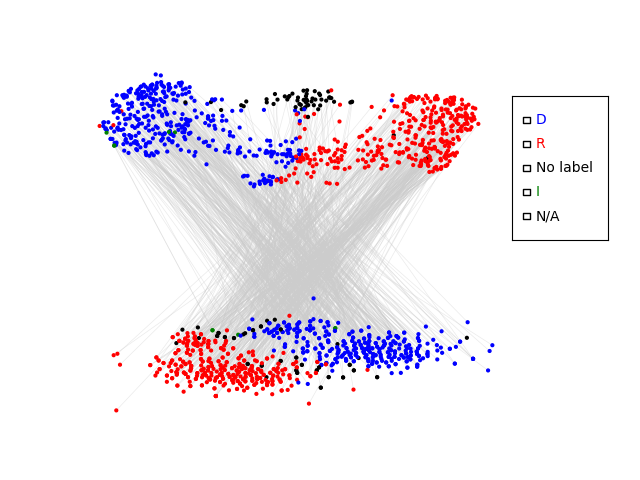

In [41]:
viz.multi_layer(top=['2d_vec_x', '2d_vec_y'], bottom=['x', 'y'], cvar='party_x', cvar_type='categorical', interactive=True, drop_outliers=True, offset=3, cmap={'D': 'Blue', 'R': 'Red', 'I': 'Green', 'N/A': 'Black'})


As you can see above, we can interact (if interactive is on) to highlight certain groups. If interactive is off, you can highlight a specific group using the 'highlight' argument. The above plot also has a cmap introduced, in this case as a dictionary of each group and a color for them. Make sure all groups are in the dictionary you input, otherwise you will get a key error indicating the group missing. 

Also, both in single and multilayer visualisations you can add arguments to the scatter plots through the scatter_kwargs (in single layer), or top_kwargs and bottom_kwargs (in multilayer).

Note: For the sake of the tutorial, multiple interactive plots were created. It is, however, quite probable that if you plot multiple interactive plots, the interactivity will fail – go one by one (at least until a better way is found to keep plotting independent). Overall, visualisations work better when launched from a standard python file rather than a notebook.


## Calculation

The third part of the library is for calculation of relevant measures of group structure and intergroup distance, and polarisation more broadly.

The class is intialised with the dataset (just like the previous class), and then the functions inherit from it. All functions right now relate only to the Speaker Landscape — more will be added in the future, including for the social network.

In [25]:
calc = pons_py.Calculation(pons)

### Silhouette Scores - silhouette()

In [26]:
sil = calc.silhouette(coord_columns=['2d_vec_x', '2d_vec_y'], group_column='party_x')

Calculating 2d silhouette scores...
Done!


In [27]:
sil

{'D': {'silhouette': -0.3174393, 'norm_silhouette': 0.34128035554594155},
 'R': {'silhouette': 0.3421535, 'norm_silhouette': 0.6710767401794697},
 'No label': {'silhouette': 0.42249894, 'norm_silhouette': 0.7112494665780105},
 'I': {'silhouette': 0.42523497, 'norm_silhouette': 0.7126175045967102},
 'N/A': {'silhouette': 0.0, 'norm_silhouette': 0.5},
 'Sil_over_0': 0.46905940594059403}

---

The silhouette function returns the average silhouette scores of each group, as well as their normalised version (which is later used for polarisation calculations). It will also give you the proportion of users with silhouette scores (non-normalised) over 0. Silhouette scores can also be calculated for subsets of groups (like between a pair of groups) and using either 2d coordinates or 1d coordinates (the future sl_measures will use 1d coordinates). The function also has a plot argument that will plot the silhouette scores.

Only one column indicated - Calcualting 1d silhouette scores...
Visualisation object created with 746 rows of data and columms: author_username, text, count, 2d_vec_x, 2d_vec_y, 1d_vec, party_x, x, y, speaker, name, z_x, z_y, silhouette, norm_sil.


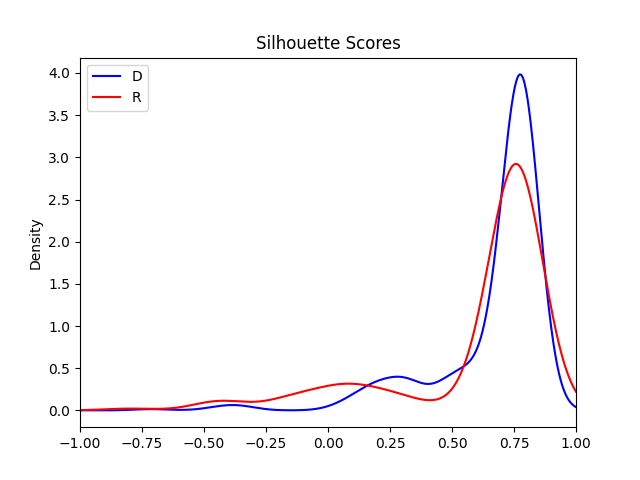

Done!


In [28]:
sil1 = calc.silhouette(coord_columns=['1d_vec'], group_column='party_x', subset=['D', 'R'], cmap={'R': 'red', 'D': 'blue'}, plot=True)

In [29]:
sil1

{'D': {'silhouette': 0.6661844, 'norm_silhouette': 0.8330921960802931},
 'R': {'silhouette': 0.6003384, 'norm_silhouette': 0.8001692208674944},
 'Sil_over_0': 0.9504021447721179}

### Overlap - overlap()

Let's try group overlap now, which we understand as a measure of intergroup distance or group distinguishability.

For this, the 1d vectors are used. Just like with silhouette scores, can be calculated both using all groups or only a subset, and can be plotted.

The function returns the proportion of the areas of all groups (or subset of groups) that overlap. In the example below, only 8% of the landscape has overlap – the groups are fairly polarised. 

Number of groups: 2


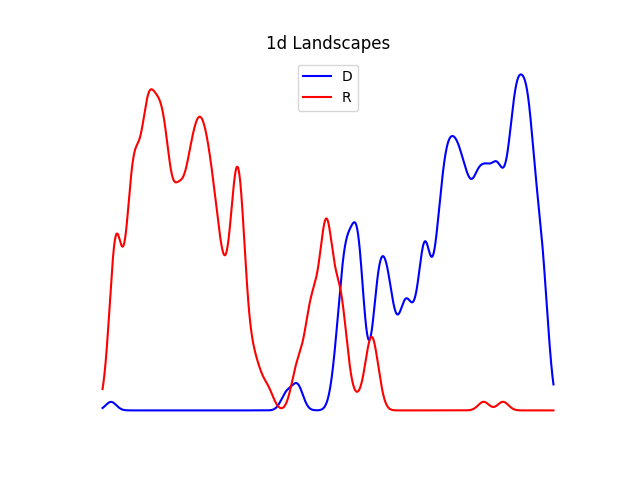

In [30]:
ov = calc.overlap(col_1d='1d_vec', group_column='party_x', subset=['D', 'R'], cmap={'R': 'red', 'D': 'blue'}, plot=True)

In [31]:
ov

0.0891320622125967

### All Speaker Landscape measures - sl_measures()

We can get the above measures and a combination of them in one go as a way to get the polarisation of the landscape (or of a subset of groups). For a more in-depth study of all of these measures, you can read the paper where these are presented HERE

Subset has 2 groups: ['D', 'R']. Calculating measures pairwise...
Number of groups: 2


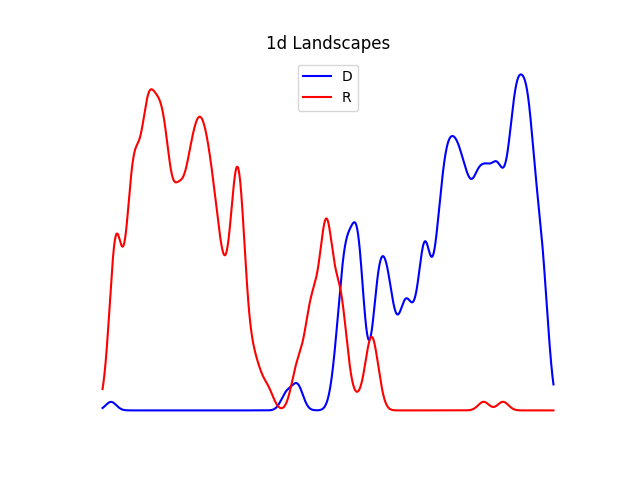

Only one column indicated - Calcualting 1d silhouette scores...
Visualisation object created with 746 rows of data and columms: author_username, text, count, 2d_vec_x, 2d_vec_y, 1d_vec, party_x, x, y, speaker, name, z_x, z_y, silhouette, norm_sil.


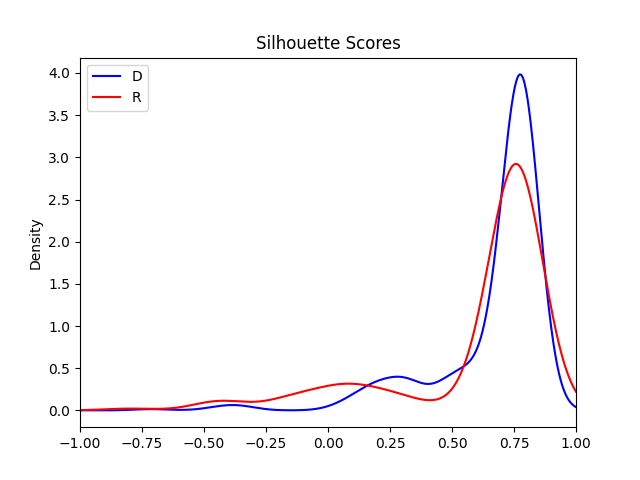

Done!


In [32]:
measures = calc.sl_measures(col_1d='1d_vec', group_column='party_x', subset=['D', 'R'], cmap={'R': 'red', 'D': 'blue'}, plot=True)

In [33]:
measures

{'groups': ['D', 'R'],
 'overlap': 0.0891320622125967,
 '1-Overlap': 0.9108679377874033,
 'avg_silhouette': 0.8166307084738937,
 'Sil_over_0': 0.9504021447721179,
 'C1': 0.7438427293614817,
 'C2': 0.8544240417751761}

A noteworthy limitation of this function, although not a problem in this tutorial, is that if you run this function with plot=True in a standard Python script (not a notebook) the plots will appear one by one and only produce the next plot when the first is closed. The measures will not be returned until all plots are closed – matplotlib limitation.

### Group ~ Term correlations - term_correlations()

Finally, it is possible to get the terms of the SL most correlated (and least correlated) to each group. The aim of this is to help further qualitative research on the language of each group.

To do so, the function term_correlations will graph the cosine similarity of each speaker and all terms in the landscape, then using its assigned group, will calculate the Pearson R correlation between each term and the group labels. It will only keep the terms with a p value under the significance level (which defaults to 0.05, but you can adjust this yourself). Finally, you can decide whether to get a dataframe of all terms~group correlations with the required significance (top_n=None), or just get the top_n terms with the highest correlation coefficient fot each group (default is top_n=20).

The function requires you to input the embedding used to create the SL — this is returned in the Processing().speaker_landscape() function, and also saved to disk. You can either input the object or the path to the file. The function also has the arguments include_agents and include_links – this is whether to include the speaker tokens or https links in the potential terms that the function returns. This is because they might take space in the top_n terms returned and might not tell much about the language of the group.

In [34]:
terms = calc.term_correlations(embedding=model, speaker_column='author_username', group_column='party_x', include_agents=False, include_links=False, top_n=None)

Speakers batches (100 per batch) left to calculate similarity for: 100%|██████████| 9/9 [00:06<00:00,  1.43it/s]


0 speakers were not found in the Word2Vec model. They will be returned as NA.


Calculating correlations. Tokens left: 100%|██████████| 31803/31803 [00:54<00:00, 582.75it/s]


In [35]:
terms

,group_labels_D,group_labels_I,group_labels_N/A,group_labels_No label,group_labels_R
the,-0.151137,NaN,NaN,NaN,0.187132
to,NaN,NaN,NaN,-0.208807,0.080172
and,NaN,NaN,NaN,-0.113287,0.102927
of,-0.082838,-0.077149,NaN,NaN,0.12941
in,0.167086,NaN,NaN,-0.184348,NaN
...,...,...,...,...,...
@hagemanforwy,-0.57192,NaN,NaN,0.110063,0.52815
recommitted,0.408346,NaN,NaN,-0.103429,-0.355371
confidently,0.246833,NaN,NaN,-0.081877,-0.203089
#fewercures,-0.507601,NaN,NaN,0.311557,0.351016


In [36]:
top_terms = calc.term_correlations(embedding=model, speaker_column='author_username', group_column='party_x', top_n=10)

Speakers batches (100 per batch) left to calculate similarity for: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]


0 speakers were not found in the Word2Vec model. They will be returned as NA.


Calculating correlations. Tokens left: 100%|██████████| 31803/31803 [00:54<00:00, 584.06it/s]


In [37]:
top_terms

{'group_labels_D': {'massachusetts': 0.7335368238249647,
  '@mayorwu': 0.7232667501454022,
  '#ca34': 0.6903411388037812,
  '@amarch4ourlives': 0.6898757754000567,
  '@protectourcare': 0.6811931377184963,
  'gentrification': 0.6784877413107904,
  'angelenos': 0.6720239589718948,
  '@ayannapressley': 0.6637807171144114,
  '#fmla': 0.6551035020594542,
  '#safercommunitiesact': 0.654968874132366},
 'group_labels_I': {'arizona': 0.2206894278524939,
  'can_afford': 0.19730914109371117,
  'arizonans': 0.19336436720310865,
  'arizonas': 0.19159060708155312,
  'az': 0.17287691644718697,
  'sinema': 0.16289306270962184,
  'tucson': 0.14911953363076852,
  'working_conditions': 0.14896659513501184,
  'facing': 0.1468191161271459,
  'smalldollar': 0.14453761948893712},
 'group_labels_N/A': {'black': 0.22360417796585547,
  '#bmhw23': 0.21186198930296127,
  'african_americans': 0.1897049052481761,
  'complications': 0.18967823718908663,
  'pregnancyrelated': 0.18707273952949835,
  'women_and_girls':